# **Case: bandeira e religião**

#### **Importando as bibliotecas necessárias**

In [1]:
import sklearn
import numpy as np
# para ignorar os avisos de mensagens das funções
import warnings
warnings.filterwarnings("ignore")

# pacote para trabalhar com data frame (tabelas)
import pandas as pd
# pacote mais básico para vizualização gráfica
import matplotlib.pyplot as plt
# um dos pacotes para fazer gráficos
import seaborn as sns
# sklearn - pacote análise de dados
# existe grande parte dos métodos mais famosos
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# função para fazer avaliação dos modelos
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import  Sequential
from tensorflow.keras.layers import Dense, Dropout

###**1. Titanic - prever se tripulante sobreviveu ou não**

* **Base de dados**: contém informações sobre os passageiros do navio Titanic que sofreu o famoso acidente.
* **Objetivo**: prever se o tripulante sobreviveu ou não.
* **Técnica usada**: Redes Neurais perceptron multicamadas (MLP).
* **Variáveis Explicativas**:
  1. <u>PassengerId</u>: número de identificação do tripulante;
  2. <u>Survived</u>: 1 - se o tribulante sobreviveu e 0 - se não sobreviveu;
  3. <u>Pclass</u>: classe do tripulante no navio;
  4. <u>Name</u>: nome do tripulante;
  5. <u>Sex</u>: sexo do tripulante;
  6. <u>Age</u>: idade do tripulante;
  7. <u>SibSp</u>: número de irmãos / cônjuges no exterior;
  8. <u>Parch</u>: número de pais / filhos a bordo; 
  9. <u>Ticket</u>: número do bilhete do tripulante;
  10. <u>Fare</u>: valor da tarifa;
  11.<u>Cabin</u>>: código da cabine;
  12. <u>Embarked</u>: porto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton).

[Base de dados Titanic](https://www.kaggle.com/prkukunoor/TitanicDataset?select=titanic_data.csv)

#### **Baixando os dados**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
raw_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Estagio_TAO_Python/Datasets/titanic_data.csv', sep = ';')

dataset = raw_dataset.copy()
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### **Estatística básica dos dados e vizualização**

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dataset.shape

(891, 12)

**Arrumando as variáveis**

Transformando alguma das variáveis categórica em binárias

In [6]:
dataset.Sex = pd.get_dummies(dataset.Sex)['male'] # 1 - male e 0 - female

Transformando alguma das variáveis categórica em numéricas

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dataset['Embarked'] = le.fit_transform(dataset['Embarked'])
dataset['Ticket'] = le.fit_transform(dataset['Ticket'])

Removendo as colunas que não serão usadas

In [8]:
dataset = dataset.drop(['PassengerId', 'Name', 'Cabin'], axis = 1)

**Trocando os dados faltantes da variável idade por média de cada grupo male e female**

In [9]:
dataset_male = dataset[dataset.Sex == 1] # dados de male
dataset_female = dataset[dataset.Sex == 0] # dados de female

linhas_faltantes = dataset[dataset.isnull().any(axis = 1)].index # linhas com dados faltantes na idade
for i in range(0, len(linhas_faltantes)):
  if dataset.Sex[linhas_faltantes[i]] == 1:
    dataset.Age[linhas_faltantes[i]] = dataset_male.Age.median()
  else:
    dataset.Age[linhas_faltantes[i]] = dataset_female.Age.median()

Visualizando as cinco primeiras linhas para saber se os resultados da transformação ficaram corretos

In [10]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,2
1,1,1,0,38.0,1,0,596,71.2833,0
2,1,3,0,26.0,0,0,669,7.9250,2
3,1,1,0,35.0,1,0,49,53.1000,2
4,0,3,1,35.0,0,0,472,8.0500,2


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    uint8  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6), uint8(1)
memory usage: 56.7 KB


Ficou tudo correto, as variáveis com mesmo tipo.

**Explorando os dados**

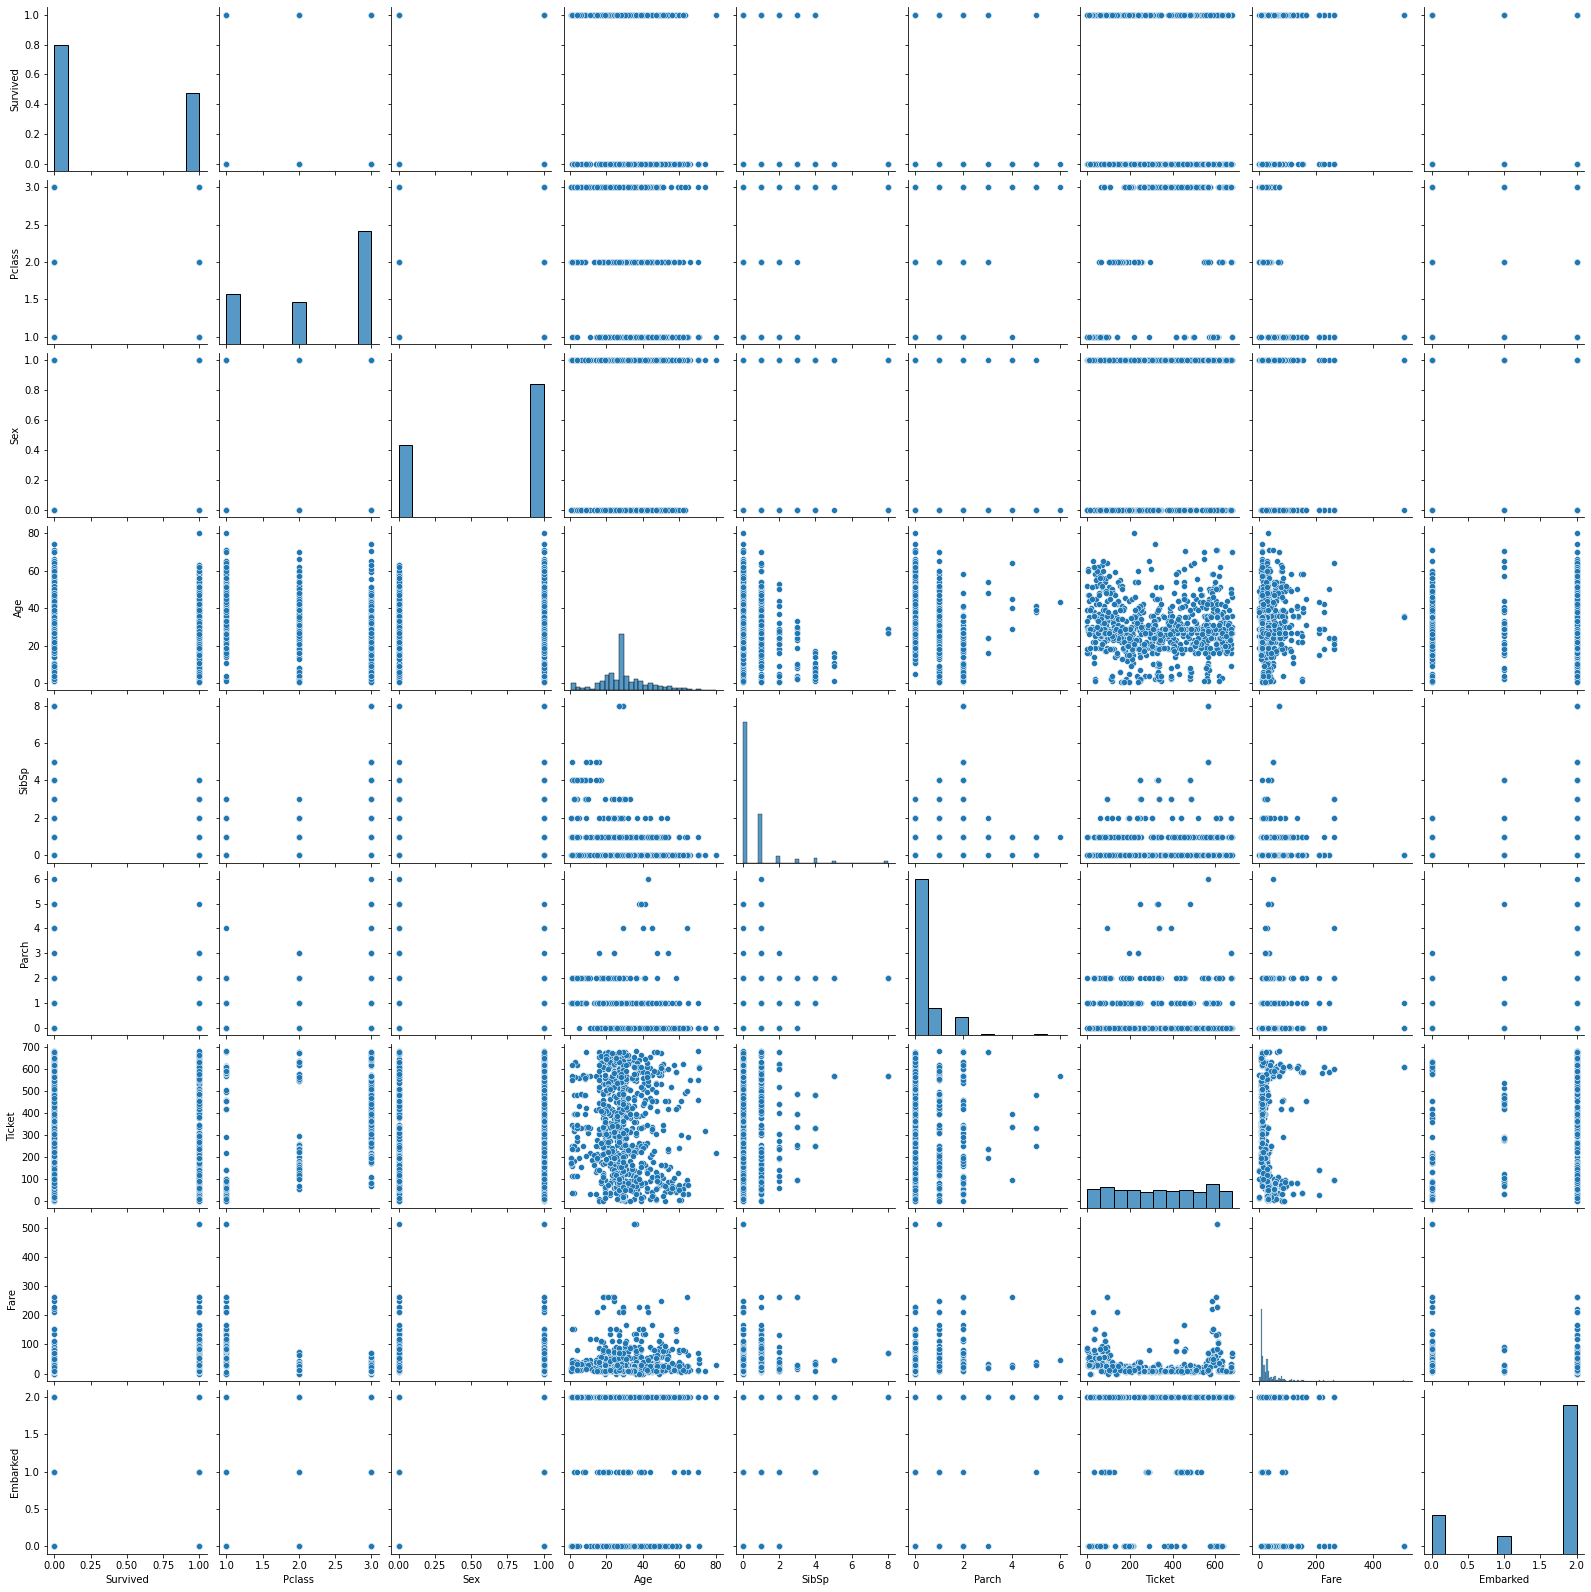

In [12]:
sns.pairplot(dataset) # diag_kind = "kde"
plt.show()

**Estatísticas básicas**

In [13]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Sex,891.0,0.647587,0.477990,0.00,0.0000,1.0000,1.0,1.0000
Age,891.0,29.441268,13.018747,0.42,22.0000,29.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Ticket,891.0,338.528620,200.850657,0.00,158.5000,337.0000,519.5,680.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Embarked,891.0,1.534231,0.791603,0.00,1.0000,2.0000,2.0,2.0000


**Correlação entre as variáveis**

In [14]:
corr = dataset.corr(method = 'spearman')
corr.style.background_gradient(cmap = 'coolwarm')

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Survived,1.000000,-0.339668,-0.543351,-0.060650,0.088879,0.138266,-0.163354,0.323736,-0.165166
Pclass,-0.339668,1.000000,0.135775,-0.315756,-0.043019,-0.022801,0.323187,-0.688032,0.098012
Sex,-0.543351,0.135775,1.000000,0.112746,-0.195204,-0.254512,0.058398,-0.259593,0.120700
Age,-0.060650,-0.315756,0.112746,1.000000,-0.159144,-0.224702,-0.073465,0.115694,-0.007624
SibSp,0.088879,-0.043019,-0.195204,-0.159144,1.000000,0.450014,0.010680,0.447113,0.013803
Parch,0.138266,-0.022801,-0.254512,-0.224702,0.450014,1.000000,0.001060,0.410074,0.030473
Ticket,-0.163354,0.323187,0.058398,-0.073465,0.010680,0.001060,1.000000,-0.171300,-0.010352
Fare,0.323736,-0.688032,-0.259593,0.115694,0.447113,0.410074,-0.171300,1.000000,-0.080853
Embarked,-0.165166,0.098012,0.120700,-0.007624,0.013803,0.030473,-0.010352,-0.080853,1.000000


Não há carrelação entre quase todas as variáveis. A correalação que chama a atenção é a correação de $-0.543351$ entre as variáveis 'Suvived' e 'Sex'.

#### **Arrumando os dados**

Removemos os outliers substituindo valores pelo mediana, através da análise dos gráficos boxplot.

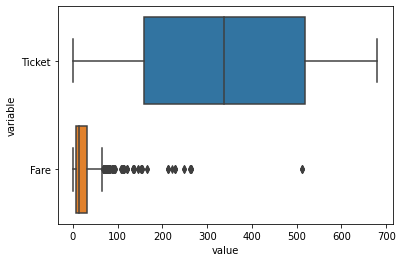

In [15]:
sns.boxplot(x = 'value', y = 'variable', data = dataset[['Ticket', 'Fare']].melt())
plt.show()

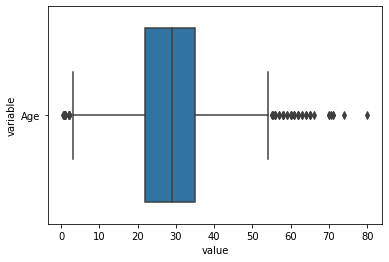

In [16]:
sns.boxplot(x = 'value', y = 'variable', data = dataset[['Age']].melt())
plt.show()

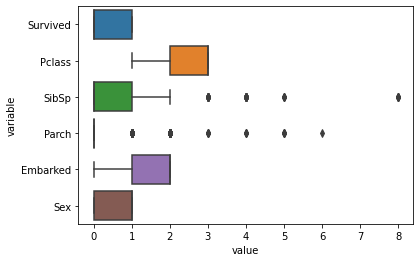

In [17]:
sns.boxplot(x = 'value', y = 'variable', data = dataset[['Survived', 'Pclass', 'SibSp', 'Parch', 'Embarked', 'Sex']].melt())
plt.show()

Verificamos pelos gráficos boxplot que há outliers em várias das variáveis.

Para remover os outiliers usamos o segunte código, que remove os valores abaixo de $Q1 - 1.5 IQR$ e acima de $Q3 + 1.5 IQR$, para cada uma das variáveis.

In [18]:
for i in range(0, 9):
  name_column = dataset.columns[i]
  Q = dataset.describe().unstack()
  Q1 = Q[name_column, '25%']
  Q3 = Q[name_column, '75%']
  IQR = Q3 - Q1
  df_extra = np.array(dataset[name_column].values.tolist())
  median = dataset.iloc[:, i]
  dataset[name_column] = np.where(df_extra < Q1 - 1.5 * IQR, int(median.median()), df_extra).tolist()
  dataset[name_column] = np.where(df_extra > Q3 + 1.5 * IQR, int(median.median()), df_extra).tolist()

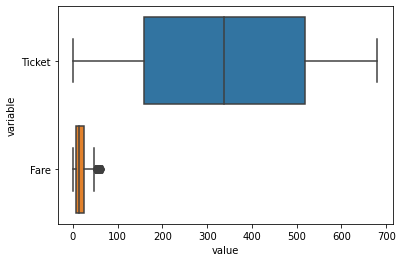

In [19]:
sns.boxplot(x = 'value', y = 'variable', data = dataset[['Ticket', 'Fare']].melt())
plt.show()

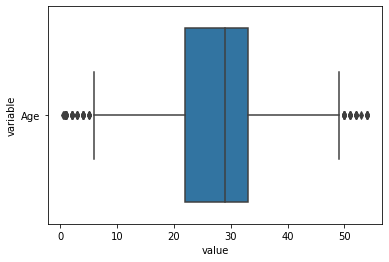

In [20]:
sns.boxplot(x = 'value', y = 'variable', data = dataset[['Age']].melt())
plt.show()

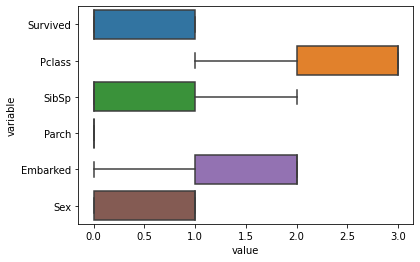

In [21]:
sns.boxplot(x = 'value', y = 'variable', data = dataset[['Survived', 'Pclass', 'SibSp', 'Parch', 'Embarked', 'Sex']].melt())
plt.show()

A maioria dos outliers foram removidos.

**Selecionando as variáveis explicativas (features) mais significativas do modelo**

Neste passo usamos o teste F para verificação quais são os 80% das variáveis mais significativas da base de dados.

[Fonte](https://minerandodados.com.br/feature-selection-bala-de-prata/)

In [22]:
X = dataset.drop(['Survived'], axis = 1)
y = dataset['Survived']

In [23]:
# Aplicando o F-test
from sklearn import feature_selection
fs = feature_selection.SelectPercentile(feature_selection.f_classif, percentile = 50)

X_treino_fs_sig = fs.fit_transform(X, y)
X_sig = pd.DataFrame(X_treino_fs_sig) # columns = [['Pclass', 'Sex', 'SibSp', 'Ticket', 'Fare', 'Embarked']]
X_sig.head()

,0,1,2,3
0,3.0,1.0,7.250,2.0
1,1.0,0.0,14.000,0.0
2,3.0,0.0,7.925,2.0
3,1.0,0.0,53.100,2.0
4,3.0,1.0,8.050,2.0


**Normalizando os dados**

Agora normalizamos os dados para que fiquem na mesma escala.

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_norm = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_sig_norm = pd.DataFrame(scaler.fit_transform(X_sig), columns = X_sig.columns)

**Dados de treinamento e teste**

Separamos os dados em dados de treinamento e teste, sendo $20\%$ para teste.

In [25]:
# 80% da variáveis mais significativas
X_sig_train_norm, X_sig_test_norm, y_train, y_test = train_test_split(X_sig_norm, y, test_size = 0.20, random_state = 376)

print('Tamanho dos dados - X_sig_train_norm: {}, X_sig_test_norm: {}, y_train: {}, y_test: {}'.format(X_sig_train_norm.shape, X_sig_test_norm.shape, y_train.shape, y_test.shape))

Tamanho dos dados - X_sig_train_norm: (712, 4), X_sig_test_norm: (179, 4), y_train: (712,), y_test: (179,)


In [26]:
# usando a base dados completa
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_norm, y, test_size = 0.20, random_state = 376)

print('Tamanho dos dados - X_train_norm: {}, X_test_norm: {}, y_train: {}, y_test: {}'.format(X_train_norm.shape, X_test_norm.shape, y_train.shape, y_test.shape))

Tamanho dos dados - X_train_norm: (712, 8), X_test_norm: (179, 8), y_train: (712,), y_test: (179,)


#### Criando modelo e treinando com os dados de treino

Aplicando o modelo de Redes Neurais perceptron multicamadas (MLP), usando dez camadas escondidas (hidden layer), com função de ativação a função logística e para resolver a otimização usa-se o Gradiente Descendente Estocástico (sgd).

In [27]:
# biblioteca para trabalhar com redes neurais
from sklearn.neural_network import MLPClassifier

# solver: resolvedor da otimização
# hidden_layer_sizes: quantidade de neurônios na camada escondida - neste caso vamos ter somente uma camada escondida
#     uma tupla em que cada elemento (número) que colocamos é a quantidade de elementos na camada escondida 
# learning_rate_init: taxa de aprendizagem inicial
# activation: função de ativação para o neurônios
# max_iter: número máximo de iterações
# random_state: semente de geração aleatória de pesos e bias de inicialização
rd_classifier = MLPClassifier(solver = 'sgd', hidden_layer_sizes = (15, ),
                              learning_rate_init = 0.01, activation = 'relu',
                              max_iter = 1500, random_state = 376)

rd_classifier.fit(X_train_norm, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15,), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=1500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=376, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Probabilidade de cada tripulante pertencer a uma classe.

In [28]:
y_pred = rd_classifier.predict_proba(X_test_norm)
y_pred;

Escolhendo a classe a que o tripulante pertence, pela classe com maior probabilidade.

In [29]:
classe_pred = np.argmax(y_pred, 1)
classe_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0])

**Acurácua da predição do modelo Rede Neurais**

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

round(accuracy_score(le.fit_transform(y_test), classe_pred), 4)

0.8101

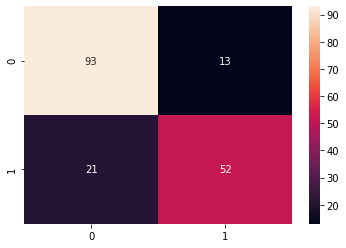



              precision    recall  f1-score   support

           0       0.82      0.88      0.85       106
           1       0.80      0.71      0.75        73

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [31]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame((pd.crosstab(y_test, classe_pred,
                               rownames = ['Real'], colnames = ['Predito'])))
cm = confusion_matrix(y_test, classe_pred)
sns.heatmap(cm, annot = True)
plt.show()
print('\n')
print(classification_report(y_test, classe_pred))

Com a aplicação da rede neural NLP, obtemos a acurácia de $81.01 \%$, na predição da condição de sobnrevivência ou não do tripulante. Acima mostramos o gráfico 'heatmap' da tabela dos resultados da predição.

#### Obtendo o melhor modelo usando Grid Search e Cross Validation

Aplicamos Grid Search e Cross Validation para encontrar os melhores parâmetros.

Melhores parâmetros:

{'activation': 'relu', 'hidden_layer_sizes': (15,), 'learning_rate_init': 0.001, 'max_iter': 1500, 'random_state': 376, 'solver': 'adam'}


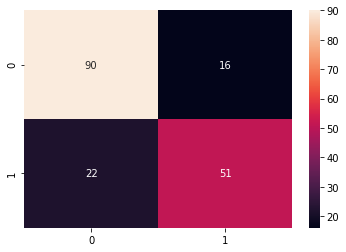

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       106
           1       0.76      0.70      0.73        73

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179

Tempo de execução: 6.0612465143203735 minutos.


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import time

ini = time.time()
tuned_parameters = [
    [{'solver': ['lbfgs', 'sgd', 'adam'], 'activation': ['identity', 'logistic', 'tanh', 'relu'],
      'learning_rate_init': [0.001, 0.01, 0.1], 'max_iter': [1500],
      'random_state': [376], 'hidden_layer_sizes': [(10, ), (15, )]
      }]
]

rd_classifier = GridSearchCV(MLPClassifier(), tuned_parameters[0], cv = 10, scoring = 'accuracy')
rd_classifier.fit(X_train_norm, y_train)
y_pred = rd_classifier.predict(X_test_norm)

print("Melhores parâmetros:\n")
print(rd_classifier.best_params_)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.show()

print(classification_report(y_test, y_pred))

fim = time.time()
print ("Tempo de execução: {} minutos.".format((fim - ini) / 60))

Com a ajuste dos parâmetros e usando GridSearch, encontramos a melhor <u>acurácia de 81% usando modelo de Redes Neurais perceptron multicamadas (MLP)</u>.

#### Aplicando outros modelos para saber se obtém melhores resultados.

Regressão Logística, KNN, Árvore de Decisão, Floresta Aleatória e Máquina de Vetor Suporte.

Nesta passo aplicamos outros modelos de Machine Learning para verificar se algum outro modelo obtém acurácia maior que a encontrada com o modelo de rede neural MLP.

Treinando modelos - tunning parameters - usando todo os dados - normalizado

Modelo: Regressão Logística
Melhores parâmetros: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Tempo de execução: 0.03348972002665202 minutos.




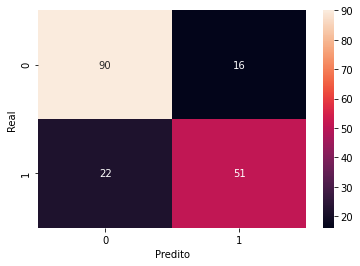



              precision    recall  f1-score   support

           0       0.80      0.85      0.83       106
           1       0.76      0.70      0.73        73

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179

Modelo: KNN
Melhores parâmetros: {'metric': 'manhattan', 'n_neighbors': 21, 'p': 1, 'weights': 'uniform'}
Tempo de execução: 0.27885167598724364 minutos.




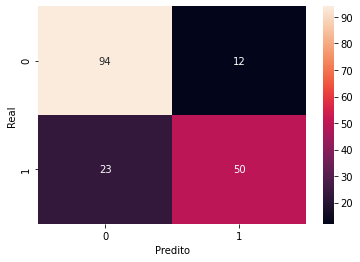



              precision    recall  f1-score   support

           0       0.80      0.89      0.84       106
           1       0.81      0.68      0.74        73

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Modelo: Árvore de Decisão
Melhores parâmetros: {'criterion': 'gini', 'max_depth': 32, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'best'}
Tempo de execução: 1.5175716519355773 minutos.




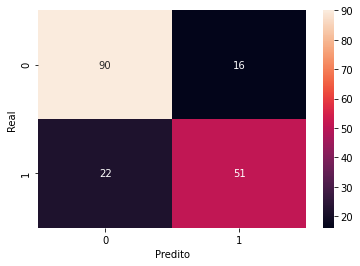



              precision    recall  f1-score   support

           0       0.80      0.85      0.83       106
           1       0.76      0.70      0.73        73

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179

Modelo: Floresta Aleatória
Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
Tempo de execução: 2.2466200232505797 minutos.




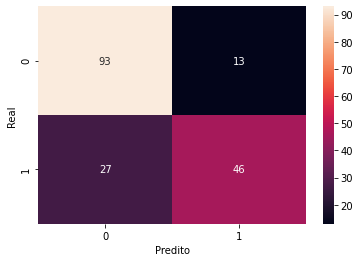



              precision    recall  f1-score   support

           0       0.78      0.88      0.82       106
           1       0.78      0.63      0.70        73

    accuracy                           0.78       179
   macro avg       0.78      0.75      0.76       179
weighted avg       0.78      0.78      0.77       179



,Modelo,Acurácia,Tempo
0,Regressão Logística,0.787709,0.033490
1,KNN,0.804469,0.278852
2,Árvore de Decisão,0.787709,1.517572
3,Floresta Aleatória,0.776536,2.246620


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import time

ini = time.time()
# df = pd.DataFrame(np.random.rand(4,5),
#                   columns=["Nome", "Acurácia", "Recall",
#                            "Especificidade", "Precisão"])

metodos_names = ['Regressão Logística', 'KNN', 'Árvore de Decisão', 'Floresta Aleatória'] # 'SVM Polinomial', 'SVM', 
df1 = pd.DataFrame(np.random.rand(len(metodos_names), 3), columns = ["Modelo", "Acurácia", "Tempo"])

# Lista de hyperpatametros para tunar.
n_neighbors = list(range(1,30))
p = [1,2]
tuned_parameters = [
    [{ 'C':[0.1, 1, 100, 1000], 'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
      'degree':[1, 2, 3, 4, 5, 6], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}],
    [{'kernel': ['poly'], 'degree': [1, 2, 3, 4, 5, 6], 'gamma': ['auto', 'scale']},
     {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': ['auto', 'scale']}],
    [{'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C':  [0.01, 0.1, 1.0, 10, 100],
      'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}], # 'max_iter': [1000]}],
    [{'n_neighbors': n_neighbors, 'metric': ['euclidean', 'manhattan', 'minkowski'],
      'p': [1, 2], 'weights': ['uniform', 'distance']}],
    [{'criterion': ['gini', 'entropy'], 'max_depth': list(range(1, 50)), 'splitter': ['best', 'random'],
      'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [1, 5, 10],
      'min_samples_leaf': [1, 5, 10]}],
    [{'criterion': ['gini', 'entropy'], 'max_depth': [5, 20, 50],
      'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 4], 'min_samples_leaf': [1, 5]}]
]

c = 2
for cl in [LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier]: # SVC
    classifier = GridSearchCV(cl(), tuned_parameters[c], cv = 5, scoring = 'accuracy')
    classifier.fit(X_train_norm, y_train)
    y_pred = classifier.predict(X_test_norm)

    fim = time.time()

    print("Modelo: {}".format(metodos_names[c-2]))
    print("Melhores parâmetros: {}".format(classifier.best_params_))
    print("Tempo de execução: {} minutos.".format((fim - ini) / 60))

    print('\n')
    cm = pd.DataFrame((pd.crosstab(y_test, y_pred,
                                   rownames = ['Real'], colnames = ['Predito'])))
    sns.heatmap(cm, annot = True)
    plt.show()

    print('\n')
    print(classification_report(y_test, y_pred))

    df1.iloc[c-2, 0] = metodos_names[c-2]
    df1.iloc[c-2, 1] = accuracy_score(y_test.astype('int'), y_pred.astype('int'))
    df1.iloc[c-2, 2] = (fim - ini) / 60

    c = c + 1
    
df1

Treinando modelos - tunning parameters - usando 80% das colunas mais significativas - normalizado

Modelo: Regressão Logística
Melhores parâmetros: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Tempo de execução: 0.029758381843566894 minutos.




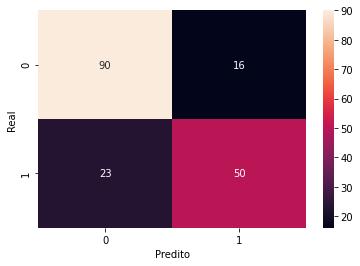



              precision    recall  f1-score   support

           0       0.80      0.85      0.82       106
           1       0.76      0.68      0.72        73

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Modelo: KNN
Melhores parâmetros: {'metric': 'manhattan', 'n_neighbors': 26, 'p': 1, 'weights': 'uniform'}
Tempo de execução: 0.2430075208346049 minutos.




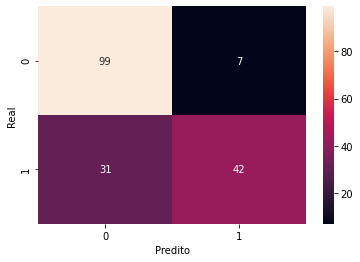



              precision    recall  f1-score   support

           0       0.76      0.93      0.84       106
           1       0.86      0.58      0.69        73

    accuracy                           0.79       179
   macro avg       0.81      0.75      0.76       179
weighted avg       0.80      0.79      0.78       179

Modelo: Árvore de Decisão
Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 19, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 10, 'splitter': 'best'}
Tempo de execução: 1.4364689747492472 minutos.




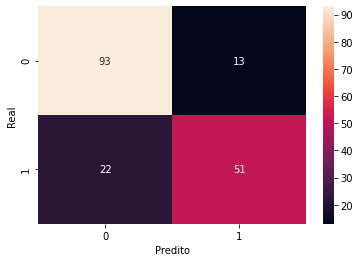



              precision    recall  f1-score   support

           0       0.81      0.88      0.84       106
           1       0.80      0.70      0.74        73

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Modelo: Floresta Aleatória
Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2}
Tempo de execução: 2.1327807307243347 minutos.




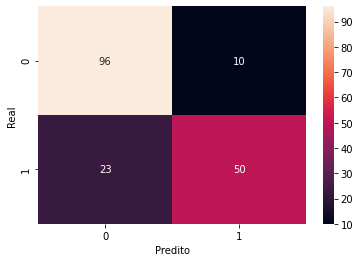



              precision    recall  f1-score   support

           0       0.81      0.91      0.85       106
           1       0.83      0.68      0.75        73

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



,Modelo,Acurácia,Tempo
0,Regressão Logística,0.782123,0.029758
1,KNN,0.787709,0.243008
2,Árvore de Decisão,0.804469,1.436469
3,Floresta Aleatória,0.815642,2.132781


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import time

ini = time.time()
# df = pd.DataFrame(np.random.rand(4,5),
#                   columns=["Nome", "Acurácia", "Recall",
#                            "Especificidade", "Precisão"])

metodos_names = ['Regressão Logística', 'KNN', 'Árvore de Decisão', 'Floresta Aleatória'] # 'SVM Polinomial', 'SVM'
df2 = pd.DataFrame(np.random.rand(len(metodos_names), 3), columns = ["Modelo", "Acurácia", "Tempo"])

# Lista de hyperpatametros para tunar.
n_neighbors = list(range(1,30))
p = [1,2]
tuned_parameters = [
    [{ 'C':[0.1, 1, 100, 1000], 'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
      'degree':[1, 2, 3, 4, 5, 6], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}],
    [{'kernel': ['poly'], 'degree': [1, 2, 3, 4, 5, 6], 'gamma': ['auto', 'scale']},
     {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': ['auto', 'scale']}],
    [{'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C':  [0.01, 0.1, 1.0, 10, 100],
      'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}], # 'max_iter': [1000]}],
    [{'n_neighbors': n_neighbors, 'metric': ['euclidean', 'manhattan', 'minkowski'],
      'p': [1, 2], 'weights': ['uniform', 'distance']}],
    [{'criterion': ['gini', 'entropy'], 'max_depth': list(range(1, 50)), 'splitter': ['best', 'random'],
      'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [1, 5, 10],
      'min_samples_leaf': [1, 5, 10]}],
    [{'criterion': ['gini', 'entropy'], 'max_depth': [5, 20, 50],
      'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 4], 'min_samples_leaf': [1, 5]}]
       # 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 5, 10], 'n_estimators': [10, 100, 1000]
]

c = 2
for cl in [LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier]: # SVC
    classifier = GridSearchCV(cl(), tuned_parameters[c], cv = 5, scoring = 'accuracy')
    classifier.fit(X_sig_train_norm, y_train)
    y_pred = classifier.predict(X_sig_test_norm)

    fim = time.time()

    print("Modelo: {}".format(metodos_names[c-2]))
    print("Melhores parâmetros: {}".format(classifier.best_params_))
    print("Tempo de execução: {} minutos.".format((fim - ini) / 60))

    print('\n')
    cm = pd.DataFrame((pd.crosstab(y_test, y_pred,
                                   rownames = ['Real'], colnames = ['Predito'])))
    sns.heatmap(cm, annot = True)
    plt.show()

    print('\n')
    print(classification_report(y_test, y_pred))

    df2.iloc[c-2, 0] = metodos_names[c-2]
    df2.iloc[c-2, 1] = accuracy_score(y_test.astype('int'), y_pred.astype('int'))
    df2.iloc[c-2, 2] = (fim - ini) / 60

    c = c + 1
    
df2

Conluímos que o melhor modelo encontrado, com os dados do navio Titanic, é o <u>Floresta Aleatória com acurácia de 81.56%</u>. Resultado um pouco melhor que o modelo de Redes Neurais Mmulticamadas (MLP), porém equivalente.

Os modelos usando somente alguma das variáveis mais significativas, obtidas usando o teste estatístico F, não teve resultados melhores que os modelos usando todos os dados.

O modelo Máquina de Vator Suporte (SVM) precisou de uma grande tempo computucional, por causa do tamanho da base de dados apesar de não ser um dataset grande. Por isso, optou-se por não usar esse método.

###**2. Titanic - prever o valor da tarifa que será paga pelo tripulante**

Usaremos a base de dados Titanic usada anteriormente com outro objetivo.
* **Objetivo**: prever o valor da tarifa (Fare) que será paga pelo tripulante.
* **Técnica usada**: Redes Neurais Sequencial.

[Base de dados Titanic](https://www.kaggle.com/prkukunoor/TitanicDataset?select=titanic_data.csv)

In [36]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.5.0


#### **Arrumando os dados para usar no formato do objetivo**

**Visualizando as cinco primeiras linhas da base de dados.**

In [37]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.250,2
1,1,1,0,38.0,1,0,596,14.000,0
2,1,3,0,26.0,0,0,669,7.925,2
3,1,1,0,35.0,1,0,49,53.100,2
4,0,3,1,35.0,0,0,472,8.050,2


**Verificando as informações da base de dados.**

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [39]:
dataset.shape

(891, 9)

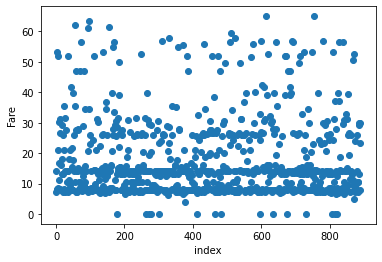

In [40]:
plt.scatter(dataset.index, dataset.Fare)
plt.xlabel('index')
plt.ylabel('Fare')
plt.show()

**Separando as variáveis explicativas e avariável resposta, preço da tarifa ('Fare') neste caso.**

In [41]:
X = dataset.drop(['Fare'], axis = 1)
y = dataset.Fare

print('Tamanho X: {}.'.format(X.shape))
print('Tamanho y: {}.'.format(y.shape))

Tamanho X: (891, 8).
Tamanho y: (891,).


**Normalizando os dados**

Normalizando os dados para ficarem na mesma escala.

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

print('Tamanho X normalizado: {}.'.format(X_norm.shape))

Tamanho X normalizado: (891, 8).


**Dados de treinamento e treino**

Separando os dados em treinamento e teste, com 20% dos dados para teste

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 376)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 376)

#### **Criando modelo e treinando com os dados de treino**

Usando o modelo Sequential com duas camadas densely connected, mais uma camada de saída que torno um valor contínuo.

In [44]:
# https://www.tensorflow.org/api_docs/python/tf/keras/activations
model = keras.Sequential([layers.Dense(100, activation = 'relu', input_shape = [len(X.keys())]),
                          layers.Dense(100, activation = 'relu'),
                          layers.Dense(100, activation = 'relu'),
                          layers.Dense(100, activation = 'relu'),
                          layers.Dense(1)
                          ])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss = 'mse', optimizer = optimizer, metrics = ['mae', 'mse'])

Descrição do modelo usando summary

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               900       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 31,301
Trainable params: 31,301
Non-trainable params: 0
_________________________________________________________________


#### **Treinando o modelo**

Treinando o modelo com 1000 epochs (épocas ou iterações).

A acurácia de cada iteração é salva em history.

In [46]:
# Cada ponto é uma iteração
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end = '')

EPOCHS = 1000

history = model.fit(X_train_norm, y_train, epochs = EPOCHS, validation_split = 0.2,
                    verbose=0, callbacks = [PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

Vizualizando os resultados do modelo para cada iteração (época) com os ersultados salvos em history.

In [47]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,43.340752,3.850629,43.340752,88.996323,6.458640,88.996323,995
996,40.578533,3.643943,40.578533,96.599548,7.067305,96.599548,996
997,39.248093,3.533198,39.248093,105.153137,7.205198,105.153137,997
998,38.864841,3.693486,38.864841,126.221512,8.035881,126.221512,998
999,35.500275,3.550915,35.500275,133.738144,8.617616,133.738144,999


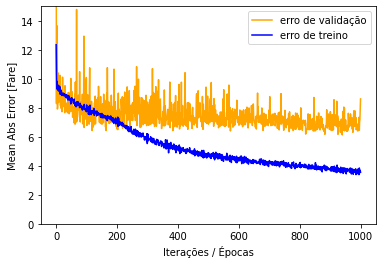

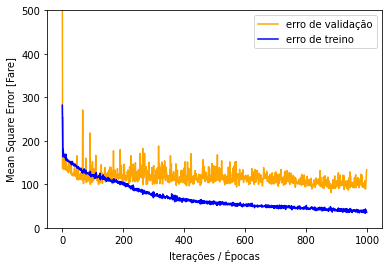

In [48]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.figure()
plt.xlabel('Iterações / Épocas') # Epoch
plt.ylabel('Mean Abs Error [Fare]')
plt.plot(hist['epoch'], hist['val_mae'], label = 'erro de validação', color = 'orange')
plt.plot(hist['epoch'], hist['mae'], label = 'erro de treino', color = 'blue')
plt.ylim([0, 15])
plt.legend()

plt.figure()
plt.xlabel('Iterações / Épocas')
plt.ylabel('Mean Square Error [Fare]')
plt.plot(hist['epoch'], hist['val_mse'], label = 'erro de validação', color = 'orange')
plt.plot(hist['epoch'], hist['mse'], label = 'erro de treino', color = 'blue')
plt.ylim([0, 500])
plt.legend()
plt.show()

Os gráficos do mean abs error (MAE) e mean square error (MSE), nos mostram que há melhorias no modelo a cada iteração, principalmente após 300 iterações.

Refazendo o treinamento do modelo para que pare automaticamente quando o score de validação não aumentar mais.

In [49]:
model = keras.Sequential([layers.Dense(100, activation = 'relu', input_shape = [len(X.keys())]),
                          layers.Dense(100, activation = 'relu'),
                          layers.Dense(100, activation = 'relu'),
                          layers.Dense(100, activation = 'relu'),
                          layers.Dense(1)
                          ])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss = 'mse', optimizer = optimizer, metrics = ['mae', 'mse'])

Usa-se o EarlyStopping callback para verificar a cada iteração a condição de treinamento.

In [50]:
# O parâmetro patience é a quantidade de iterações para checar as melhoras
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

history = model.fit(X_train_norm, y_train, epochs = EPOCHS,
                    validation_split = 0.2, verbose = 0, callbacks = [early_stop, PrintDot()])


...............

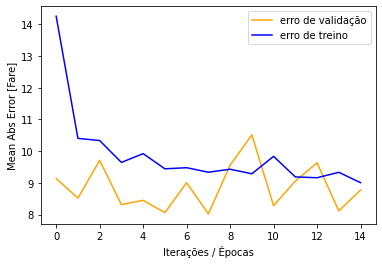

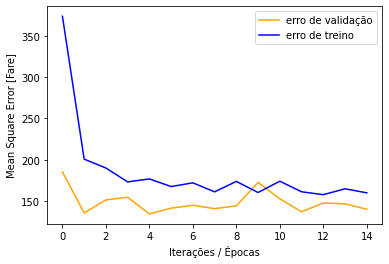

In [51]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.figure()
plt.xlabel('Iterações / Épocas') # Epoch
plt.ylabel('Mean Abs Error [Fare]')
plt.plot(hist['epoch'], hist['val_mae'], label = 'erro de validação', color = 'orange')
plt.plot(hist['epoch'], hist['mae'], label = 'erro de treino', color = 'blue')
plt.legend()

plt.figure()
plt.xlabel('Iterações / Épocas')
plt.ylabel('Mean Square Error [Fare]')
plt.plot(hist['epoch'], hist['val_mse'], label = 'erro de validação', color = 'orange')
plt.plot(hist['epoch'], hist['mse'], label = 'erro de treino', color = 'blue')
plt.legend()
plt.show()

Pelo gráfico verificamos que em média, o erro de base de treinamento é de mais ou menos 8 Fare.

Agora verificamos a média do erro nos dados de treino e em seguinda aplicaremos o modelo nestes dados.

In [52]:
loss, mae, mse = model.evaluate(X_test_norm, y_test, verbose = 2)

print("Testing set Mean Abs Error: {:5.2f} Fare".format(mae))

6/6 - 0s - loss: 160.9538 - mae: 9.0351 - mse: 160.9538
Testing set Mean Abs Error:  9.04 Fare


A média do erro na base de treino foi de 8.03 Fare.

#### **Fazendo predições dos valores da tarifa (Fare) paga pelos tripulantes na base de test.**

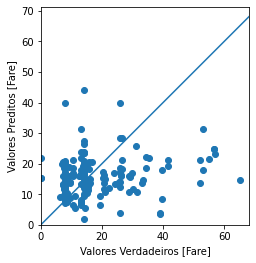

In [53]:
y_pred = model.predict(X_test_norm).flatten()

plt.scatter(y_test, y_pred)
plt.xlabel('Valores Verdadeiros [Fare]')
plt.ylabel('Valores Preditos [Fare]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

O modelo não parace muito bom para prever a tarifa paga pelos tripulantes do navio Titanic.

**Distribuição dos erros**

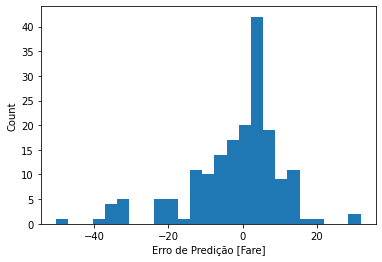

In [54]:
error = y_pred - y_test
plt.hist(error, bins = 25)
plt.xlabel("Erro de Predição [Fare]")
_ = plt.ylabel("Count")